In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wisconsin-breast-cancer-cytology-features/wisconsin_breast_cancer.csv


**Author:** Liam Labuschagne

**ID:** 1575313

In [2]:
wis = pd.read_csv('/kaggle/input/wisconsin-breast-cancer-cytology-features/wisconsin_breast_cancer.csv')

In [3]:
wis.head(5)

id  thickness  size  shape  adhesion  single  nuclei  chromatin  \
0  1000025          5     1      1         1       2     1.0          3   
1  1002945          5     4      4         5       7    10.0          3   
2  1015425          3     1      1         1       2     2.0          3   
3  1016277          6     8      8         1       3     4.0          3   
4  1017023          4     1      1         3       2     1.0          3   

   nucleoli  mitosis  class  
0         1        1      0  
1         2        1      0  
2         1        1      0  
3         7        1      0  
4         1        1      0

In [4]:
wis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         699 non-null    int64  
 1   thickness  699 non-null    int64  
 2   size       699 non-null    int64  
 3   shape      699 non-null    int64  
 4   adhesion   699 non-null    int64  
 5   single     699 non-null    int64  
 6   nuclei     683 non-null    float64
 7   chromatin  699 non-null    int64  
 8   nucleoli   699 non-null    int64  
 9   mitosis    699 non-null    int64  
 10  class      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


**Plotting**

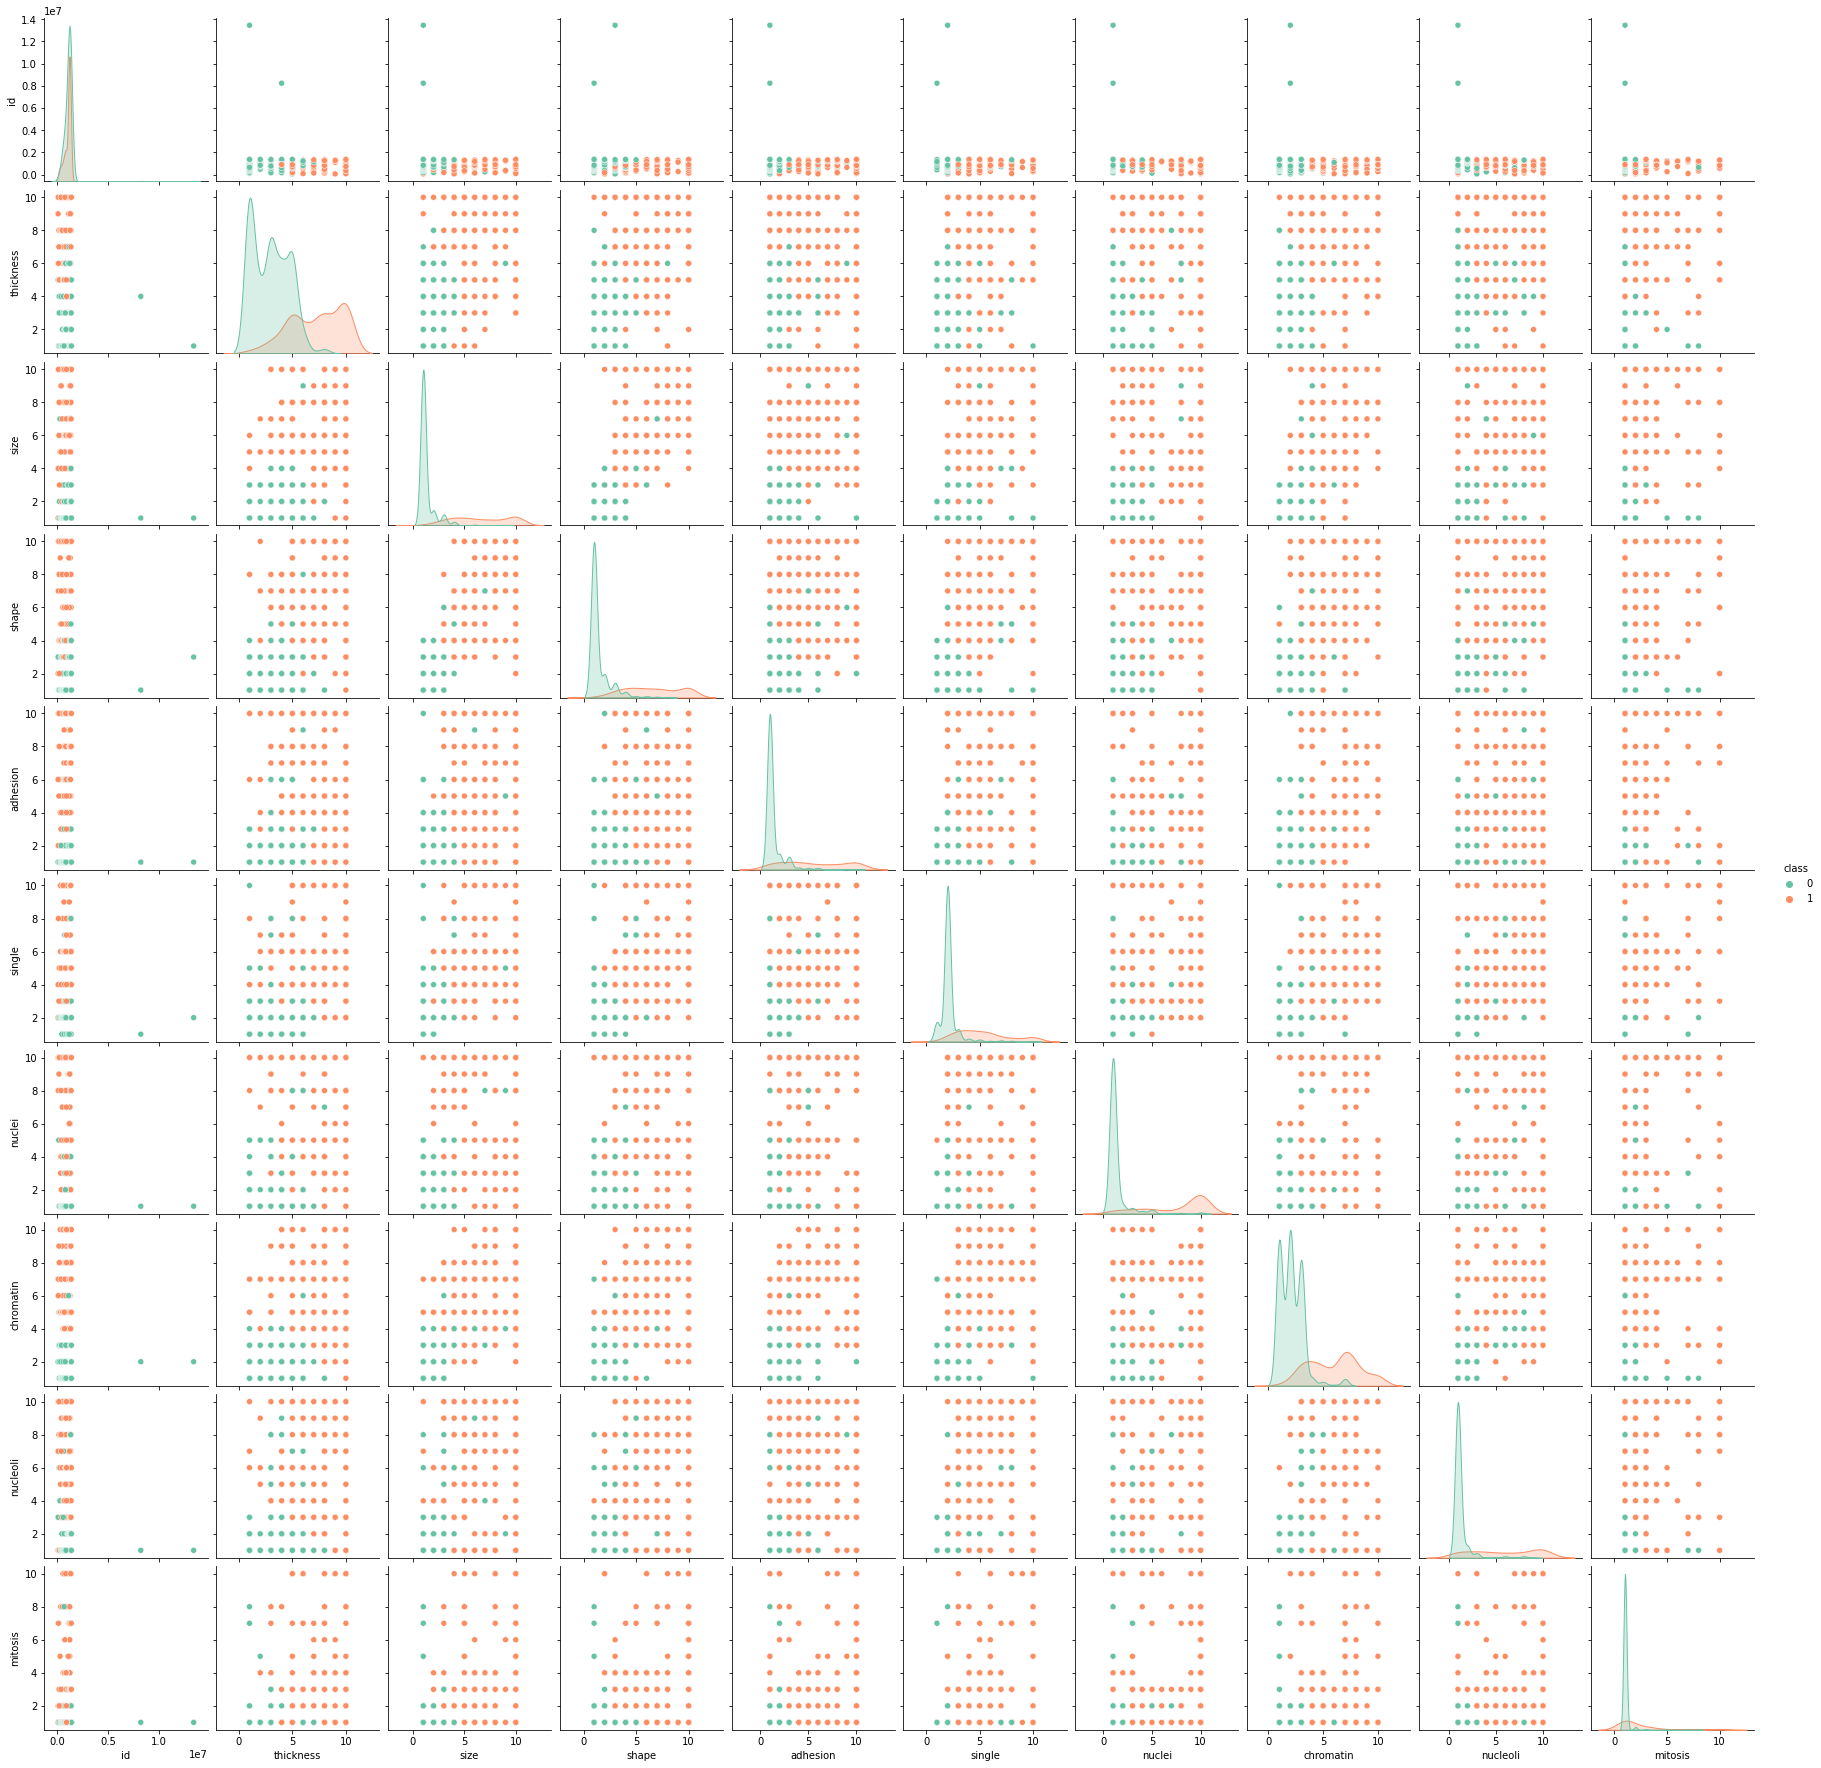

In [5]:
import seaborn as sns
sns.pairplot(data=wis,hue='class',palette='Set2')

I had an issue with missing values so I found this code on a kaggle tutorial: [Missing Values Tutorial](https://www.kaggle.com/code/dansbecker/handling-missing-values/notebook)

This then removed the column names which I fixed by adding them back in afterwards based on this SO post: [SO Post](https://stackoverflow.com/questions/29586323/how-to-retain-column-headers-of-data-frame-after-pre-processing-in-scikit-learn) 

In [6]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
wis_imputed = pd.DataFrame(my_imputer.fit_transform(wis), columns = wis.columns)
wis_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         699 non-null    float64
 1   thickness  699 non-null    float64
 2   size       699 non-null    float64
 3   shape      699 non-null    float64
 4   adhesion   699 non-null    float64
 5   single     699 non-null    float64
 6   nuclei     699 non-null    float64
 7   chromatin  699 non-null    float64
 8   nucleoli   699 non-null    float64
 9   mitosis    699 non-null    float64
 10  class      699 non-null    float64
dtypes: float64(11)
memory usage: 60.2 KB


In [7]:
x = wis_imputed.iloc[:,1:-1]
x.head(5)

thickness  size  shape  adhesion  single  nuclei  chromatin  nucleoli  \
0        5.0   1.0    1.0       1.0     2.0     1.0        3.0       1.0   
1        5.0   4.0    4.0       5.0     7.0    10.0        3.0       2.0   
2        3.0   1.0    1.0       1.0     2.0     2.0        3.0       1.0   
3        6.0   8.0    8.0       1.0     3.0     4.0        3.0       7.0   
4        4.0   1.0    1.0       3.0     2.0     1.0        3.0       1.0   

   mitosis  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0

In [8]:
y = wis_imputed.iloc[:,-1]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
694    0.0
695    0.0
696    1.0
697    1.0
698    1.0
Name: class, Length: 699, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1575313)
print(x_train.shape)
print(x_test)
print(y_train.shape)
print(y_test)

(559, 9)
     thickness  size  shape  adhesion  single  nuclei  chromatin  nucleoli  \
601        1.0   1.0    1.0       1.0     1.0     1.0        2.0       1.0   
7          2.0   1.0    2.0       1.0     2.0     1.0        3.0       1.0   
582        6.0  10.0    5.0       5.0     4.0    10.0        6.0      10.0   
627        2.0   1.0    1.0       1.0     2.0     5.0        1.0       1.0   
310        2.0   1.0    1.0       1.0     3.0     1.0        2.0       1.0   
..         ...   ...    ...       ...     ...     ...        ...       ...   
433        3.0   2.0    2.0       3.0     2.0     1.0        1.0       1.0   
586        8.0  10.0   10.0      10.0     6.0    10.0       10.0      10.0   
28         2.0   1.0    1.0       1.0     2.0     1.0        2.0       1.0   
343        1.0   1.0    1.0       1.0     2.0     1.0        1.0       1.0   
185        2.0   1.0    1.0       1.0     1.0     1.0        3.0       1.0   

     mitosis  
601      1.0  
7        1.0  
582      

In [10]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(pred[:3])
print(y_test[:3])

[0. 0. 1.]
601    0.0
7      0.0
582    1.0
Name: class, dtype: float64


From this I can see that the first 3 predictions match up correctly with the first three test answers (class).

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97        94
         1.0       0.90      0.98      0.94        46

    accuracy                           0.96       140
   macro avg       0.94      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



I can see from this classification report that my predictions were overall 96% accurate with 140 examples. 

On a class basis, 
* the first class (0) had a precision of 99% with 94 examples
* the second class (1) had a precision of 90% with only 46 examples

In [12]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[89  5]
 [ 1 45]]


From the confusion matrix we see that
* For class 0, 89 were correctly predicted as class 0 and 5 incorrectly predicted as class 1
* For class 1, 1 was incorrectly predicted as class 0 and 45 correctly predicted as class 1